## Final Project Submission

Please fill out:
* Student name:Calvine Dasilver, Hellen Samuel, Salahudin Salat, Jack otieno and Sandra Kiptum
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Nikita
* Blog post URL:


 #  Demystifying House Sales Analysis with Regression Modeling in a Northwestern County

 ## Project Overview

  ## **Business Understanding**

The real estate market plays a crucial role in the economic health and stability of a region. Understanding the factors that influence house prices is essential for both buyers and sellers to navigate the market effectively. This project focuses on a specific northwestern county in the United States, aiming to shed light on the key determinants of property valuation in this area.

##### Challenges of a Fluctuating Real Estate Market:
* Market fluctuations make it difficult for real estate agents to price houses and guide clients on offers.
* Rapid price fluctuations create a challenging environment for homebuyers, making it difficult to secure a good deal and avoid overpaying.
* Trying to pick the perfect moment to sell a house for maximum profit feels like playing the lottery – stressful, unpredictable, and with slim odds of success.
* High land prices and buyers struggling to afford homes make it difficult for builders to build new houses.

##### Problem Statements:
We want to find out what makes houses expensive in a certain county in the northwest US. We'll also look at ways to measure how much these things like number of bedrooms or location affect the price. Finally, we'll see if we can build a tool to predict house prices based on these important features.

   ##### Conclusion
 Our study looked at how the ups and downs of the housing market in a northwestern county are making things tough for everyone involved. To help out, we're building a tool to predict house prices. This will give real estate agents valuable information so they can give their clients the best advice in this unpredictable market.
   ##### Proposed Solutions:
We propose utilizing multiple linear regression, a powerful machine learning technique. This method allows us to analyze a large dataset of house sales and identify the statistical relationships between various property features (e.g., square footage, number of bedrooms, location) and the corresponding sale prices.

##### Objectives:
1. Develop a robust multiple linear regression model that accurately predicts house prices in the chosen northwestern county.
2. Identify the most significant factors influencing property value within this specific market.
3. Provide valuable insights into the housing market dynamics of the region, benefiting potential buyers, real estate agents, and other stakeholders.

  ### <li> **Data Understanding**

Our analysis leverages the King County House Sales dataset.This information is stored in a file called "kc_house_data.csv".
 It's a rich resource containing over 21,500 records and 20 distinct features(columns). Spanning house sales from May 2014 to May 2015, this dataset provides a comprehensive snapshot of the King County housing market during that period.

**The King County House Sales dataset contains the following columns;**

id - unique identified for a house

date - Date house was sold 

Price - Sale price (prediction target)

bedrooms - Number of bedrooms,

bathrooms - Number of bathrooms,

sqft_living - Square footage of living space in the home,

sqft_lot - Square footage of the lot,

floors - Number of floors (levels) in house,

view - Quality of view from house,

condition - How good the overall condition of the house is. Related to maintenance of house,

grade - Overall grade of the house. Related to the construction and design of the house,

sqft_above - Square footage of house apart from basement,

sqft_basement - Square footage of the basement,

yr_built - Year when house was built,

yr_renovated - Year when house was renovated,

zipcode - ZIP Code used by the United States Postal Service,

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors,

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors, and

sell_yr - Date house was sold.


In [58]:
# This function takes a CSV file path as input and displays various informative elements
# about the loaded DataFrame, providing insights into the data structure, data types,
# and summary statistics.
def dataset_info(file_path):
  data = pd.read_csv(file_path)
  print("Dataframe Info:")
  print(data.shape, data.columns, data.dtypes, data.info(), data.describe(), sep="\n\n")

dataset_info('data/kc_house_data.csv')

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  flo

## **Data Preparation**

In [55]:
import csv
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.metrics import mean_absolute_error


In [3]:
#from user_functions import null, building_model, plotting_regression_plots, drop_duplicates, remove_outliers_zscore

In [4]:
#Reading our data
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
#checking on data data types and null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

from this we can see all our columns and data types, we can also see that we have sum null or missing values, let's have a better look at this

In [6]:
# checking the number of rows and columns
df.shape

(21597, 21)

a complete column with no missing values should have 21597 rows

In [7]:
def null(data):
    return data.isna().sum()
#checking for the number of null values with our user defined function
null(df)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

we can see that waterfront, view and yr_renovated have null values. the sum of these null values is 6281(assuming the null values are in different rows) rows compared to our dataframe of 21597 rows i would rather we drop the individual rows instead of entire columns

In [8]:
# Dropping rows with null vallues
df.dropna(axis=0, inplace = True)


In [9]:
df.shape

(15762, 21)

In [10]:

null(df)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
def drop_duplicates(df, subset=None):
    """
    Drops duplicates from a pandas DataFrame based on a subset of columns and returns the new data frame

   it takes in the df and the subset eg subset = "id"
    """
    return df.drop_duplicates(subset=subset, keep = "first", inplace = True)

# checking for and dropping duplicates using our user defined function
drop_duplicates(df, subset='id')
df.shape

(15676, 21)



from the shape we can se that we did have duplicate values but we're good to go now<br>

let's look at our statistical summarry


In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.567600e+04,1.567600e+04,15676.000000,15676.000000,15676.000000,1.567600e+04,15676.000000,15676.000000,15676.000000,15676.000000,15676.000000,15676.000000,15676.000000,15676.000000,15676.000000
mean,4.593625e+09,5.414927e+05,3.379434,2.122066,2086.057285,1.529400e+04,1.496587,1794.363167,1971.165859,82.640278,98077.487114,47.559219,-122.213415,1991.289168,12911.040125
std,2.875440e+09,3.726037e+05,0.935193,0.766735,918.753332,4.189635e+04,0.539689,828.829546,29.351892,397.679588,53.366170,0.138651,0.140763,684.179299,28037.170327
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.126049e+09,3.210000e+05,3.000000,1.750000,1430.000000,5.045250e+03,1.000000,1200.000000,1952.000000,0.000000,98033.000000,47.469275,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.600000e+03,1.500000,1570.000000,1975.000000,0.000000,98065.000000,47.571150,-122.229000,1850.000000,7620.000000
75%,7.334501e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.071700e+04,2.000000,2220.000000,1997.000000,0.000000,98117.000000,47.677400,-122.124000,2370.000000,10102.250000
max,9.895000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


statistical summary observation count for each column is 15676 this confirms that we dont have missing values. The mean value of the house price is 541,492.7 USD  while the minimum house price is 82,000 USD and maximum house price is USD 7,700,000 The standard deviation of the house price stands at USD 372,603.7

now let's do a bit of feature engineering<br>
our data has the columns year built and year renovated, this however has very little significance to us, what will be of use though is how old it is and how long ago it was renovated, we will use the day it was sold as a reference to get those

In [13]:
# our dates are in int and float, let's convert them to proper date format
date_sold=pd.to_datetime(df['date'])
last_renovation = pd.to_datetime(df['yr_renovated'])
date_built = pd.to_datetime(df['yr_built'])

# Calculate the age of the house in months
df['house_age'] = (date_sold - date_built).dt.days / 30.4375
# Calculate the age since last renovation in months
df['renovation_age'] = (date_sold - last_renovation).dt.days / 30.4375

#drop columns we're no longer using
df.drop(columns=['date', 'yr_renovated', 'yr_built'], inplace=True)
df.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovation_age
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,98125,47.7210,-122.319,1690,7639,539.203285,539.203285
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,98136,47.5208,-122.393,1360,5000,539.203285,539.236140
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,98074,47.6168,-122.045,1800,7503,541.535934,541.568789
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,98053,47.6561,-122.005,4760,101930,532.271047,532.303901
6,1321400060,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,1715,?,98003,47.3097,-122.327,2238,6819,533.782341,533.815195
8,2414600126,229500.0,3,1.00,1780,7470,1.0,NO,NONE,Average,7 Average,1050,730.0,98146,47.5123,-122.337,1780,8113,543.375770,543.408624
9,3793500160,323000.0,3,2.50,1890,6560,2.0,NO,NONE,Average,7 Average,1890,0.0,98038,47.3684,-122.031,2390,7570,542.258727,542.291581
11,9212900260,468000.0,2,1.00,1160,6000,1.0,NO,NONE,Good,7 Average,860,300.0,98115,47.6900,-122.292,1330,6000,532.763860,532.796715
13,6054650070,400000.0,3,1.75,1370,9680,1.0,NO,NONE,Good,7 Average,1370,0.0,98074,47.6127,-122.045,1370,10208,537.133470,537.166324
14,1175000570,530000.0,5,2.00,1810,4850,1.5,NO,NONE,Average,7 Average,1810,0.0,98107,47.6700,-122.394,1360,4850,542.258727,542.291581


In [14]:
#transformation of categorical values 'condition' column
df['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True)
df.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovation_age
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,3,7 Average,2170,400.0,98125,47.7210,-122.319,1690,7639,539.203285,539.203285
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,5,7 Average,1050,910.0,98136,47.5208,-122.393,1360,5000,539.203285,539.236140
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,3,8 Good,1680,0.0,98074,47.6168,-122.045,1800,7503,541.535934,541.568789
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,3,11 Excellent,3890,1530.0,98053,47.6561,-122.005,4760,101930,532.271047,532.303901
6,1321400060,257500.0,3,2.25,1715,6819,2.0,NO,NONE,3,7 Average,1715,?,98003,47.3097,-122.327,2238,6819,533.782341,533.815195
8,2414600126,229500.0,3,1.00,1780,7470,1.0,NO,NONE,3,7 Average,1050,730.0,98146,47.5123,-122.337,1780,8113,543.375770,543.408624
9,3793500160,323000.0,3,2.50,1890,6560,2.0,NO,NONE,3,7 Average,1890,0.0,98038,47.3684,-122.031,2390,7570,542.258727,542.291581
11,9212900260,468000.0,2,1.00,1160,6000,1.0,NO,NONE,4,7 Average,860,300.0,98115,47.6900,-122.292,1330,6000,532.763860,532.796715
13,6054650070,400000.0,3,1.75,1370,9680,1.0,NO,NONE,4,7 Average,1370,0.0,98074,47.6127,-122.045,1370,10208,537.133470,537.166324
14,1175000570,530000.0,5,2.00,1810,4850,1.5,NO,NONE,3,7 Average,1810,0.0,98107,47.6700,-122.394,1360,4850,542.258727,542.291581


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15676 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              15676 non-null  int64  
 1   price           15676 non-null  float64
 2   bedrooms        15676 non-null  int64  
 3   bathrooms       15676 non-null  float64
 4   sqft_living     15676 non-null  int64  
 5   sqft_lot        15676 non-null  int64  
 6   floors          15676 non-null  float64
 7   waterfront      15676 non-null  object 
 8   view            15676 non-null  object 
 9   condition       15676 non-null  int64  
 10  grade           15676 non-null  object 
 11  sqft_above      15676 non-null  int64  
 12  sqft_basement   15676 non-null  object 
 13  zipcode         15676 non-null  int64  
 14  lat             15676 non-null  float64
 15  long            15676 non-null  float64
 16  sqft_living15   15676 non-null  int64  
 17  sqft_lot15      15676 non-null 

In [16]:
# from our data we can also see that sqft_basement is data type object wich may impact our modelling later
# so lets convert it to int and remove ? from our data
#convert basement into int and remove ?
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: 0 if x=='?' else int(x.split('.')[0]))

# lets check the data type of sqft_basement
df['sqft_basement'].dtype

dtype('int64')

the next step will be to check for outliers

In [17]:
len(df)

15676

In [18]:
#removing outliers
def remove_outliers_zscore(df):
    """
    takes in a dataframe and removes outliers from a dataframe using Z-score method.
    
    """
    import numpy as np
    # Calculate Z-scores
    z_scores = np.abs((df - df.mean()) / df.std())
    
    # Identify outliers
    outliers_z = df[(z_scores > 3).any(axis=1)]
    
    # Remove outliers from dataframe
    df_cleaned = df.drop(outliers_z.index)
    return df_cleaned
df = remove_outliers_zscore(df)


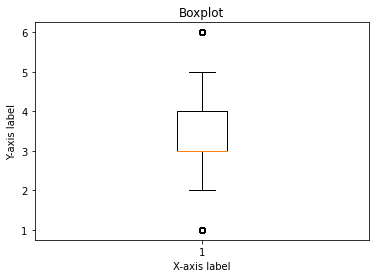

In [19]:
# checking for outliers

# Creating a boxplot
plt.boxplot(df["bedrooms"])

# Adding labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Boxplot')

# Display the plot
plt.show()


from the above boxplot we can see that our very obvious outlier of 33 bedrooms is gone

### **Exploratory Data Analysis**

In this section, we will perform exploratory data analysis (EDA) to understand the data better and discover any patterns, trends using univariate,bivariate and multivariate analysis

We will use descriptive statistics and visualizations to summarize the main characteristics of the data and examine the relationships between the features and the target variable.

We will also check the distribution and correlation of the variables and identify any potential problems or opportunities for the analysis.

#### Univariate Analysis

Univariate analysis involves the examination of single variables.We focus in the summary statistics of target variable-price to help us undersatand the distribution and skewness of house prices

Basic Statistics of Price:
 count    1.450700e+04
mean     4.953697e+05
std      2.466704e+05
min      8.200000e+04
25%      3.150000e+05
50%      4.400000e+05
75%      6.150000e+05
max      1.650000e+06
Name: price, dtype: float64


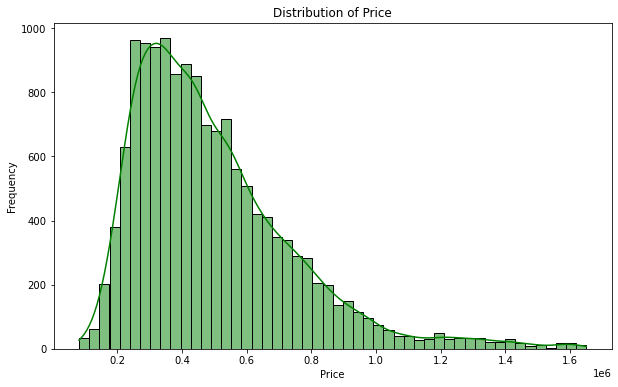

In [20]:
# Display summary statistics of the 'price' variable
price_stats = df['price'].describe()
print("Basic Statistics of Price:\n", price_stats)

# Visualizing the distribution of 'price' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='green')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the distribution of house price is skewed to the left suggesting that while most houses are of lower prices, there are some properties with significantly higher prices that are pulling the tail

#### Bivariate Analysis

In this section, we will perform bivariate analysis to examine the relationship between the target variable (price) and the other features in the data. We will use scatter plots to show the direction and strength of the relationship between two numeric variables. This will help us understand how one variable affects or is affected by another variable and identify any patterns or trends that may exist.

In [21]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'house_age', 'renovation_age'],
      dtype='object')

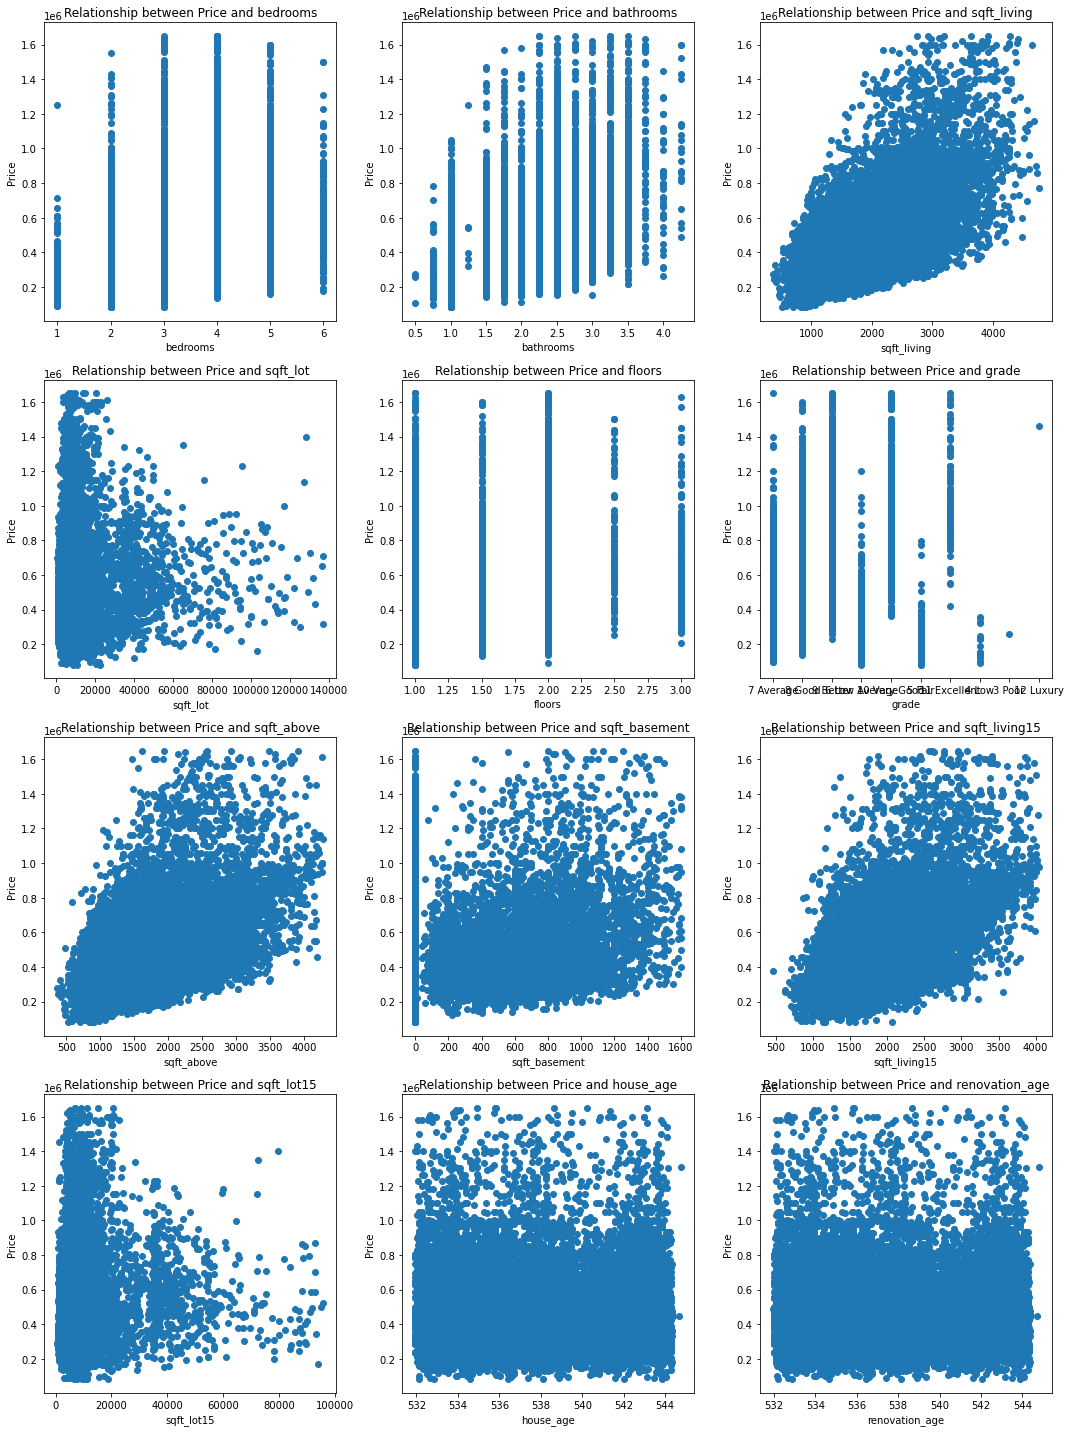

In [22]:
#relationships between our target variable and other independent variables in the dataset
import math
variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'grade', 'sqft_above',  'sqft_basement', 'sqft_living15','sqft_lot15', 'house_age', 'renovation_age']
num_rows = math.ceil(len(variables) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(df[var],df['price'])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_title(f'Relationship between Price and {var}')

plt.tight_layout()
plt.show()

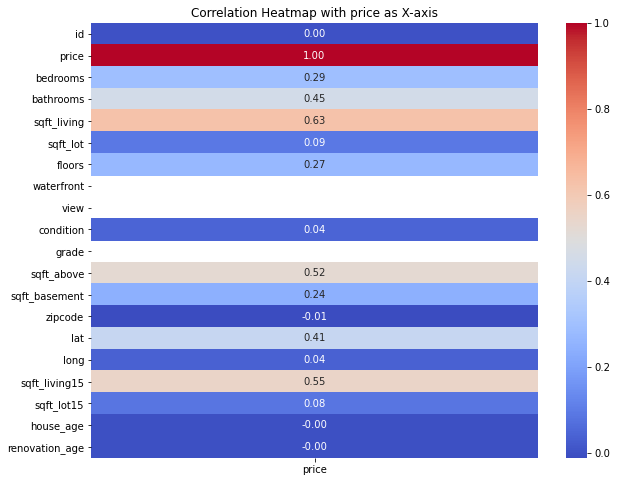

In [23]:

# Replace non-numeric values with NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Create a correlation matrix
corr_matrix = df_numeric.corr()

# Select only 'sale_value' as x-axis
corr_sale_value = corr_matrix[['price']]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_sale_value, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap with price as X-axis')
plt.show()

The scatter plots show that there is a positive relationship between some of the independent variables and the price of a house. This means that houses with higher values for these variables(sqft_living, bathrooms, sqft_above and sqft_living15) tend to be more expensive<br>
something worth noting as well is that as the number of bedrooms increases so does the cost but only to a point.

#### Multivariate Analysis

In this section, we will perform multivariate analysis to examine the relationship between various variables in the data. We will use heatmap to visualize the correlation matrix of the features and see how they are related to each other and to the price.

A heatmap can show us the strength and direction of the correlation between two variables using different colors and shades. This will help us identify the most important features for the prediction and avoid multicollinearity problems.

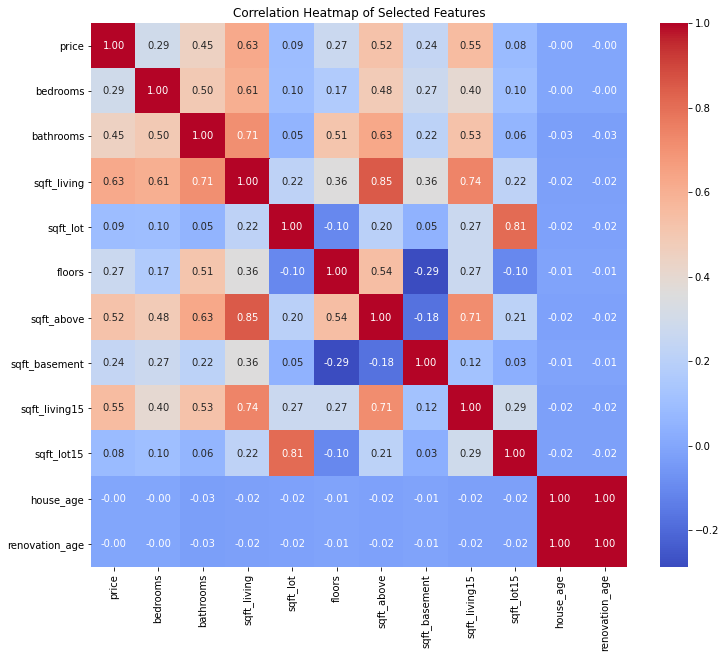

In [24]:


# Select the columns of interest
columns_of_interest = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'grade', 'sqft_above','sqft_basement', 'sqft_living15',
                       'sqft_lot15', 'house_age', 'renovation_age']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()



Positive correlations are typically represented by shades of red, and negative correlations by shades of blue.
We note that bathrooms and sqft_living are highly positively correlated.
from this we can see some correlated coumns eg sqft_lot and sqft_lot15 meaning that if your 15 neighbours have small lots the house in question probably will as well


## **Regression Modelling** <br>
### Simple Linear Regression

when doing linear regresssion, the data to be used has to comply with LINE method;
<li>L - Linearity(Relationship between x and y should be linear)
<li>I - Independence(the observations and errors are independent of each other)
<li>N - Normality(the residuals are normarly distribute)
<li>E - Equal variance(the variance of the residuals across all level of idependent variables)

For simple linear regression we will use the one column that has the strongest correlation to the price. this will also be our baseline model for the multiple linear regression 

In [25]:
# checking for correlation
df.corr()['price'].sort_values(ascending=False).head(15)

price            1.000000
sqft_living      0.627915
sqft_living15    0.553436
sqft_above       0.523454
bathrooms        0.451600
lat              0.413830
bedrooms         0.293639
floors           0.271068
sqft_basement    0.243189
sqft_lot         0.093293
sqft_lot15       0.084873
condition        0.044942
long             0.036832
id               0.003885
house_age       -0.000597
Name: price, dtype: float64

from the correlation sqft_living has the highest correlatio with price, we will therefore use sqft_living as the exogenous variable and price as our endogenous variable

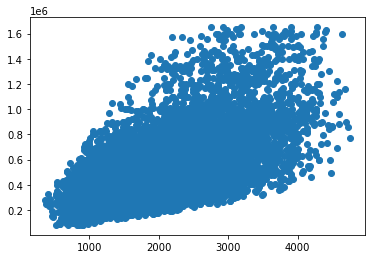

In [26]:
plt.scatter(df["sqft_living"], df["price"])

from this we can see that there is a linearity between the two variables satisfying one of the 4 LINE specifications. we will check for the others in our model summary

#### Building our model


In [27]:
# importing necessary modules
import statsmodels.api as sm

# defining our independent and dependent variables
X = df[["sqft_living"]]
y = df["price"]

# building our model
model = sm.OLS(y, sm.add_constant(X))  # Using sm.OLS directly instead of a custom function

# fitting the model to our data
simple_results = model.fit()
print(simple_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     9442.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        12:01:41   Log-Likelihood:            -1.9706e+05
No. Observations:               14507   AIC:                         3.941e+05
Df Residuals:                   14505   BIC:                         3.941e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.597e+04   4504.707     19.086      

##### Interprating our models results

<li> form the prob(fstatistic) we can tell that our model is statistically significant as the p_value is well below our alpha(0.05)
<li> from our R-Squared(39.4%) it shows that our model explain about 39.4% of variance in price 
<li> our intercept has a p_value less than our alpha(5%) thus it is statistically significant, from this we can say that if the square square   footage of the living room in the home is zero the price will be about 85970 USD, which doesn't really make sense but it is useful for our modeL
<li> our slope coefficient is  207.3962  showing that an increase of 1 square foot living is associated with an increase of about  207.3962 USD in price
<li>we are 95% confident that the intercept lies between 77100 and 94800
<li> we are also 95% confident that our slope is within the range 203.212 and 211.580


<li>Durbin-Watson: A test for autocorrelation in the residuals. Values between 0 and 2 suggest positive autocorrelation, between 2 and 4 suggest negative autocorrelation, and around 2 suggest no autocorrelation.<br>
this shows no autocorrelation in our errors satisfying the second condition of the LINE requirments<br>

<li> Omnibus test: shows a normality of residuals. A low p-value (< 0.05) indicates that the residuals are not normally distributed.
<li>Jarque-Bera (JB): Another test for normality of residuals. A low p-value (< 0.05) indicates that the residuals are not normally distributed.<br>

from the  Omnibus test and Jarque-Bera (JB) we can see that our residuals are not normally distributed which shows weakness in our model. Considering other independent variables may improve this 
 


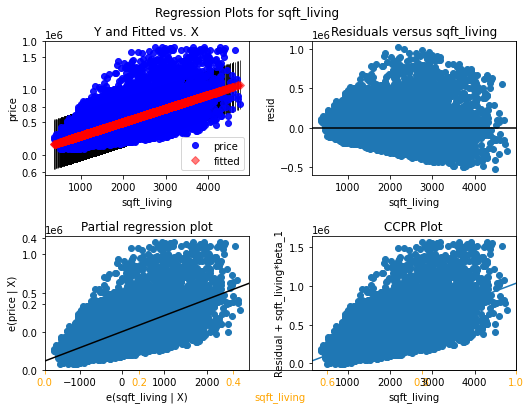

In [34]:
def plotting_regression_plots(your_model, independent_variable):
    """
    Plots all necessary regression plots to evaluate a model
    """
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and axis
    sm.graphics.plot_regress_exog(your_model, independent_variable, fig=fig)  # Plot regression plots on the axis
    ax.set_xlabel(independent_variable, color='orange')  # Set x-axis label color to orange
    ax.tick_params(axis='x', colors='orange')  # Set x-axis tick color to orange
plotting_regression_plots(simple_results,"sqft_living")

we are plotting our residuals to understand where our model is perfoming best and where it is performing poorly

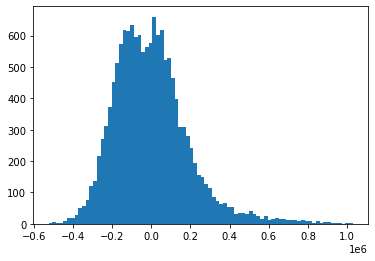

In [35]:
plt.hist(simple_results.resid, bins = "auto")
plt.show()

our graphs give us the same information as our summary did <br>
from this we can see that our residuals are close to normally distributed hence satisfying the NORMALITY assumption of regression
We will now do multiple linear regression to solve our low R-squared

### Multiple Linear Regression

In [36]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovation_age
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,3,7 Average,2170,400,98125,47.7210,-122.319,1690,7639,539.203285,539.203285
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,5,7 Average,1050,910,98136,47.5208,-122.393,1360,5000,539.203285,539.236140
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,3,8 Good,1680,0,98074,47.6168,-122.045,1800,7503,541.535934,541.568789
6,1321400060,257500.0,3,2.25,1715,6819,2.0,NO,NONE,3,7 Average,1715,0,98003,47.3097,-122.327,2238,6819,533.782341,533.815195
8,2414600126,229500.0,3,1.00,1780,7470,1.0,NO,NONE,3,7 Average,1050,730,98146,47.5123,-122.337,1780,8113,543.375770,543.408624




For Multiple Linear Regression, we are going to use more than one predictor variable to predict price for our case

Our baseline for this model will be the linear Regression that we just did above
 

In [37]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'house_age', 'renovation_age'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14507 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              14507 non-null  int64  
 1   price           14507 non-null  float64
 2   bedrooms        14507 non-null  int64  
 3   bathrooms       14507 non-null  float64
 4   sqft_living     14507 non-null  int64  
 5   sqft_lot        14507 non-null  int64  
 6   floors          14507 non-null  float64
 7   waterfront      14507 non-null  object 
 8   view            14507 non-null  object 
 9   condition       14507 non-null  int64  
 10  grade           14507 non-null  object 
 11  sqft_above      14507 non-null  int64  
 12  sqft_basement   14507 non-null  int64  
 13  zipcode         14507 non-null  int64  
 14  lat             14507 non-null  float64
 15  long            14507 non-null  float64
 16  sqft_living15   14507 non-null  int64  
 17  sqft_lot15      14507 non-null 

let's edit our data abit to make it better for modellinng

In [39]:
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [40]:
df['view'].unique()

array(['NONE', 'GOOD', 'AVERAGE', 'EXCELLENT', 'FAIR'], dtype=object)

In [41]:
df['grade'].unique()

array(['7 Average', '8 Good', '9 Better', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '4 Low', '3 Poor', '12 Luxury'],
      dtype=object)

In [42]:
# Change waterfront to numeric
df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x=='YES' else 0)
# Change view to numeric
df['view'] = df['view'].apply(lambda x: 0 if x=='NONE' else (1 if x=='FAIR' else (2 if x=='AVERAGE' else (3 if x=='GOOD' else 4))))
 # Convert grade to int
df['grade'] = df['grade'].apply(lambda x: x[:2] if x[0]=='1' else x[:1]).astype('int64')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14507 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              14507 non-null  int64  
 1   price           14507 non-null  float64
 2   bedrooms        14507 non-null  int64  
 3   bathrooms       14507 non-null  float64
 4   sqft_living     14507 non-null  int64  
 5   sqft_lot        14507 non-null  int64  
 6   floors          14507 non-null  float64
 7   waterfront      14507 non-null  int64  
 8   view            14507 non-null  int64  
 9   condition       14507 non-null  int64  
 10  grade           14507 non-null  int64  
 11  sqft_above      14507 non-null  int64  
 12  sqft_basement   14507 non-null  int64  
 13  zipcode         14507 non-null  int64  
 14  lat             14507 non-null  float64
 15  long            14507 non-null  float64
 16  sqft_living15   14507 non-null  int64  
 17  sqft_lot15      14507 non-null 

our data is now ready for modelling. let build our model

In [44]:
# defind our X and y
X = df.drop(['price', 'zipcode', 'id'], axis =1)
X = pd.get_dummies(X, columns = ['condition', 'view', 'grade', 'waterfront'], drop_first =True)
y = df['price']

#build the model and fitting it
ML_model = sm.OLS(y, sm.add_constant(X)).fit()

#print out summary
ML_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1031.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        12:14:39   Log-Likelihood:            -1.9241e+05
No. Observations:               14507   AIC:                         3.849e+05
Df Residuals:                   14476   BIC:                         3.851e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.817e+07   1.36e+06    -35.478      0.000   -5.08e+07   -4.55e+07
bedrooms       -7179.9990   1793.035     -4.004      0.000   -1.07e+04   -3665.420
bathrooms       4366.2317   2776.133      1.573      0.116   -1075.343    9807.807
sqft_living      112.3002     16.108      6.972      0.000      80.726     143.875
sqft_lot           0.3549      0.169      2.095      0.036       0.023       0.687
floors          9110.2916   3130.283      2.910      0.004    2974.536    1.52e+04
sqft_above       -13.9773     16.051     -0.871      0.384     -45.438      17.484
sqft_basement     -4.5594     15.902     -0.287      0.774     -35.729      26.611
lat             6.211e+05   8598.919     72.225      0.000    6.04e+05    6.38e+05
long            -1.45e+05   1.08e+04    -13.449      0.000   -1.66e+05   -1.24e+05
sqft_living15     49.3505      3.287     15.015      0.000      42.908      55.793
sqft_lot15        -1.6348      0.220     -7.437      0.000      -2.066      -1.204
house_age       3.369e+06   1.85e+05     18.240      0.000    3.01e+06    3.73e+06
renovation_age -3.367e+06   1.85e+05    -18.227      0.000   -3.73e+06      -3e+06
condition_3    -1355.6917   1.36e+04     -0.099      0.921   -2.81e+04    2.54e+04
condition_4     5.715e+04   1.37e+04      4.169      0.000    3.03e+04     8.4e+04
condition_5     1.134e+05   1.41e+04      8.014      0.000    8.57e+04    1.41e+05
view_1          1.014e+05   9807.652     10.341      0.000    8.22e+04    1.21e+05
view_2          8.507e+04   6188.307     13.746      0.000    7.29e+04    9.72e+04
view_3          1.235e+05   9172.008     13.469      0.000    1.06e+05    1.42e+05
view_4          1.859e+05   1.45e+04     12.807      0.000    1.57e+05    2.14e+05
grade_4         -1.88e+05   1.44e+05     -1.304      0.192    -4.7e+05    9.45e+04
grade_5        -1.936e+05    1.4e+05     -1.383      0.167   -4.68e+05    8.09e+04
grade_6         -1.88e+05    1.4e+05     -1.347      0.178   -4.62e+05    8.56e+04
grade_7        -1.565e+05    1.4e+05     -1.121      0.262    -4.3e+05    1.17e+05
grade_8        -9.148e+04    1.4e+05     -0.655      0.512   -3.65e+05    1.82e+05
grade_9         2.877e+04    1.4e+05      0.206      0.837   -2.45e+05    3.03e+05
grade_10        1.281e+05    1.4e+05      0.916      0.360   -1.46e+05    4.02e+05
grade_11        2.309e+05    1.4e+05      1.643      0.100   -4.45e+04    5.06e+05
grade_12        5.247e+05   1.98e+05      2.655      0.008    1.37e+05    9.12e+05
waterfront_1    2.149e+05   2.15e+04     10.004      0.000    1.73e+05    2.57e+05
==============================================================================
Omnibus:                     3373.238   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12677.510
Skew:                   

#### Model 2 Interpretations

<li> Our adj R-squared for this model is 68%. This means that our model explains 68% of variance in Price
<li> Our p-values are below alpha of 5% suggesting that our model is statistically significant

Evaluating The Model

Adjusted r_squared is not enough to evaluate our model and therefore we need to see MSE and RMSE as well

In [45]:
X = np.hstack((X, np.zeros((X.shape[0], 1))))  # Adding a column of zeros as the additional feature

y_pred = ML_model.predict(X)

In [46]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5
print(mse)
print(rmse)

1.752011963028223e+18
1323635887.6323287


From this we can see that our MSE and RMSE are huge and that is not a good thing to have. we need to build a 3rd model to rectify this. 
We might attribute this to over-fitting since we trained and tested on the same data and we used data with low corrilation to our dependent variable

does our Model follow the LINE assumptions?

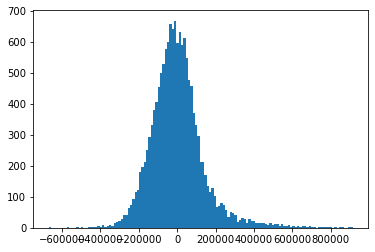

In [47]:
#normality of residuals

plt.hist(ML_model.resid, bins='auto')
plt.show()

we can tell that out residuals follow normality assumption

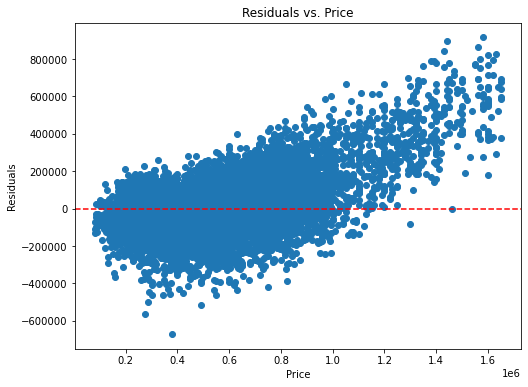

In [48]:
# idependance of errors and equal variance
plt.figure(figsize=(8, 6))
plt.scatter(y, ML_model.resid)
plt.xlabel('Price')
plt.ylabel('Residuals')
plt.title('Residuals vs. Price')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

There is heteroskedicity and the residuals seem to be in a pattern

we will check for linearity from the correlation coefficients

In [54]:
df.corr()['price'].sort_values(ascending=False).head(20)

price             1.000000
grade             0.637527
sqft_living       0.627915
sqft_living15     0.553436
sqft_above        0.523454
bathrooms         0.451600
lat               0.413830
view              0.305725
bedrooms          0.293639
floors            0.271068
sqft_basement     0.243189
waterfront        0.112252
sqft_lot          0.093293
sqft_lot15        0.084873
condition         0.044942
long              0.036832
id                0.003885
house_age        -0.000597
renovation_age   -0.000788
zipcode          -0.011267
Name: price, dtype: float64

#### Model 3

in this model we will clean our data to remove non- linear data to build this model. We will also train part of the data to evaluate the model on the remaining data ie we will do a train test split to reduce overfitting

In [50]:
X = df[['bathrooms','sqft_living','grade', 'sqft_above','sqft_living15']]
X = pd.get_dummies(X, columns=['grade'], drop_first=True)
y = df['price']
# spliting data to  prevent overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state= 66)

In [51]:
#fitting the model
model_3 = sm.OLS(y, X).fit()

#model resultsd
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                          1.002e+04
Date:                Fri, 03 May 2024   Prob (F-statistic):                        0.00
Time:                        12:14:42   Log-Likelihood:                     -1.9573e+05
No. Observations:               14507   AIC:                                  3.915e+05
Df Residuals:                   14494   BIC:                                  3.916e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms     -1.617e+04   3157.527     -5.123      0.000   -2.24e+04   -9985.517
sqft_living     164.9055      4.406     37.424      0.000     156.268     173.543
sqft_above      -88.5563      4.191    -21.132      0.000     -96.770     -80.342
sqft_living15    35.2934      3.851      9.164      0.000      27.745      42.842
grade_4         1.19e+05   4.55e+04      2.614      0.009    2.98e+04    2.08e+05
grade_5        1.352e+05   1.55e+04      8.727      0.000    1.05e+05    1.66e+05
grade_6         1.72e+05   6985.674     24.619      0.000    1.58e+05    1.86e+05
grade_7        2.181e+05   7161.611     30.449      0.000    2.04e+05    2.32e+05
grade_8        3.089e+05   8972.307     34.429      0.000    2.91e+05    3.26e+05
grade_9          4.6e+05   1.13e+04     40.819      0.000    4.38e+05    4.82e+05
grade_10       5.788e+05   1.38e+04     41.801      0.000    5.52e+05    6.06e+05
grade_11       6.972e+05   2.16e+04     32.329      0.000    6.55e+05    7.39e+05
grade_12       1.014e+06   1.76e+05      5.768      0.000    6.69e+05    1.36e+06
==============================================================================
Omnibus:                     2602.780   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6335.267
Skew:                           1.006   Prob(JB):                         0.00
Kurtosis:                       5.536   Cond. No.                     4.14e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 3 interpretations

<li>We can clearly see that our adj R-squared has jumped significantly to 90%.
<li>The model is statistically significant since its p-value is less than alpha 5%


evaluating model 3

In [57]:
y_pred = model_3.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(rmse)
print(mae)
print(mse)

179627.64408786144
134849.3972940279
32266090520.555424


From the calculated MAE and RMSE we can tell that the third model is way accurate compared to the previous 2 models and we recomend using 3rd model in predicting the price of a house

## RECCOMENDATIONS

From the 3 modules built we advise potential buyers or sellers to concider model 3 in determining the price of a house. 
We can also suggest that the factor affecting the price of a house most is square foot living but they should concider the grade if they want to have a more sell value

Next Steps

1.Find more features that home buyers often value highly to add to the model e.g distance from social amenities like hospitals, schools <br>
2.Correlate the information of this model with ones for other states <br>
3.They should build a pipeline that continously updates the model with data that is upto date <br>

We need to be aware of certain constraints within the data, as these might influence our analysis and interpretation of the results. From the sources;

1. The data may contain anomalies or inconsistencies that require careful examination during analysis. For instance, a record lists a house with 33 bedrooms, which appears to be an outlier

2. It's important to consider the time frame of the data (May 2014 - May 2015) as it may not fully capture the current market dynamics in King County.
3. It's important to acknowledge the scope of the data. While it provides details on house features, it may not capture external factors such as interest rates or the overall economic climate, which can also play a role in determining property values.